In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.duplicated().sum()

0

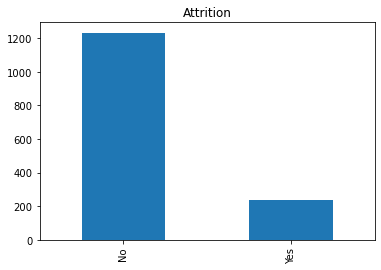

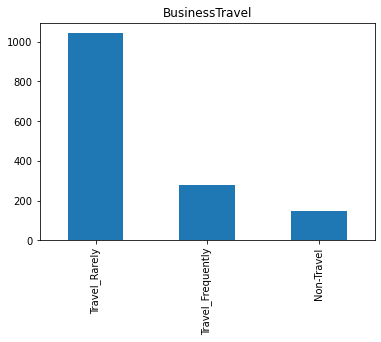

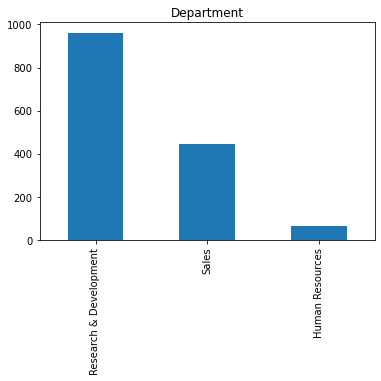

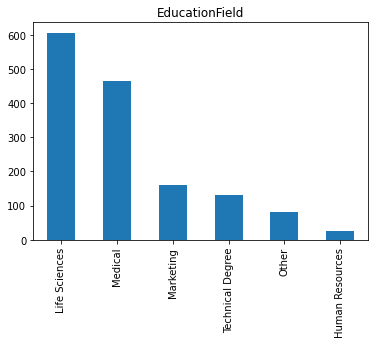

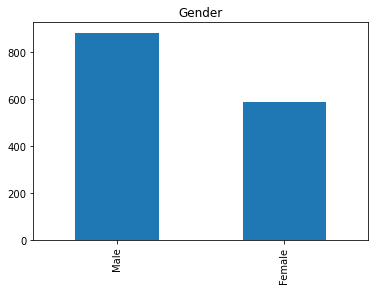

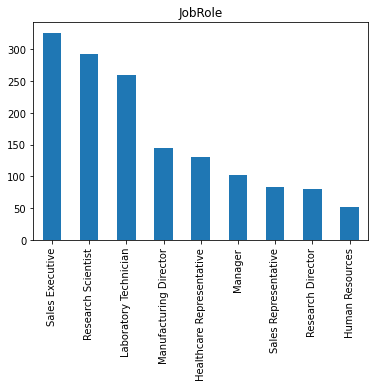

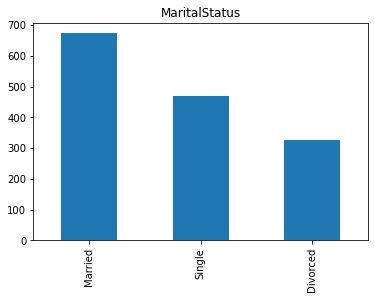

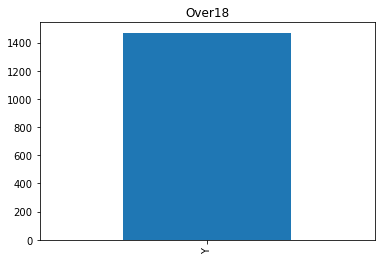

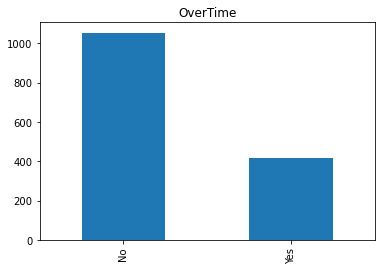

In [7]:
for n in df.select_dtypes(include='object'):
  plt.figure() #figsize=(10,3))
  #plt.hist(df[n],density=True)
  df[n].value_counts().plot(kind='bar')
  plt.title(n)
  plt.xticks(rotation=90)


la columna Over18 no aporta información

Hay un sesgo en la OverTime y BusinessTravel


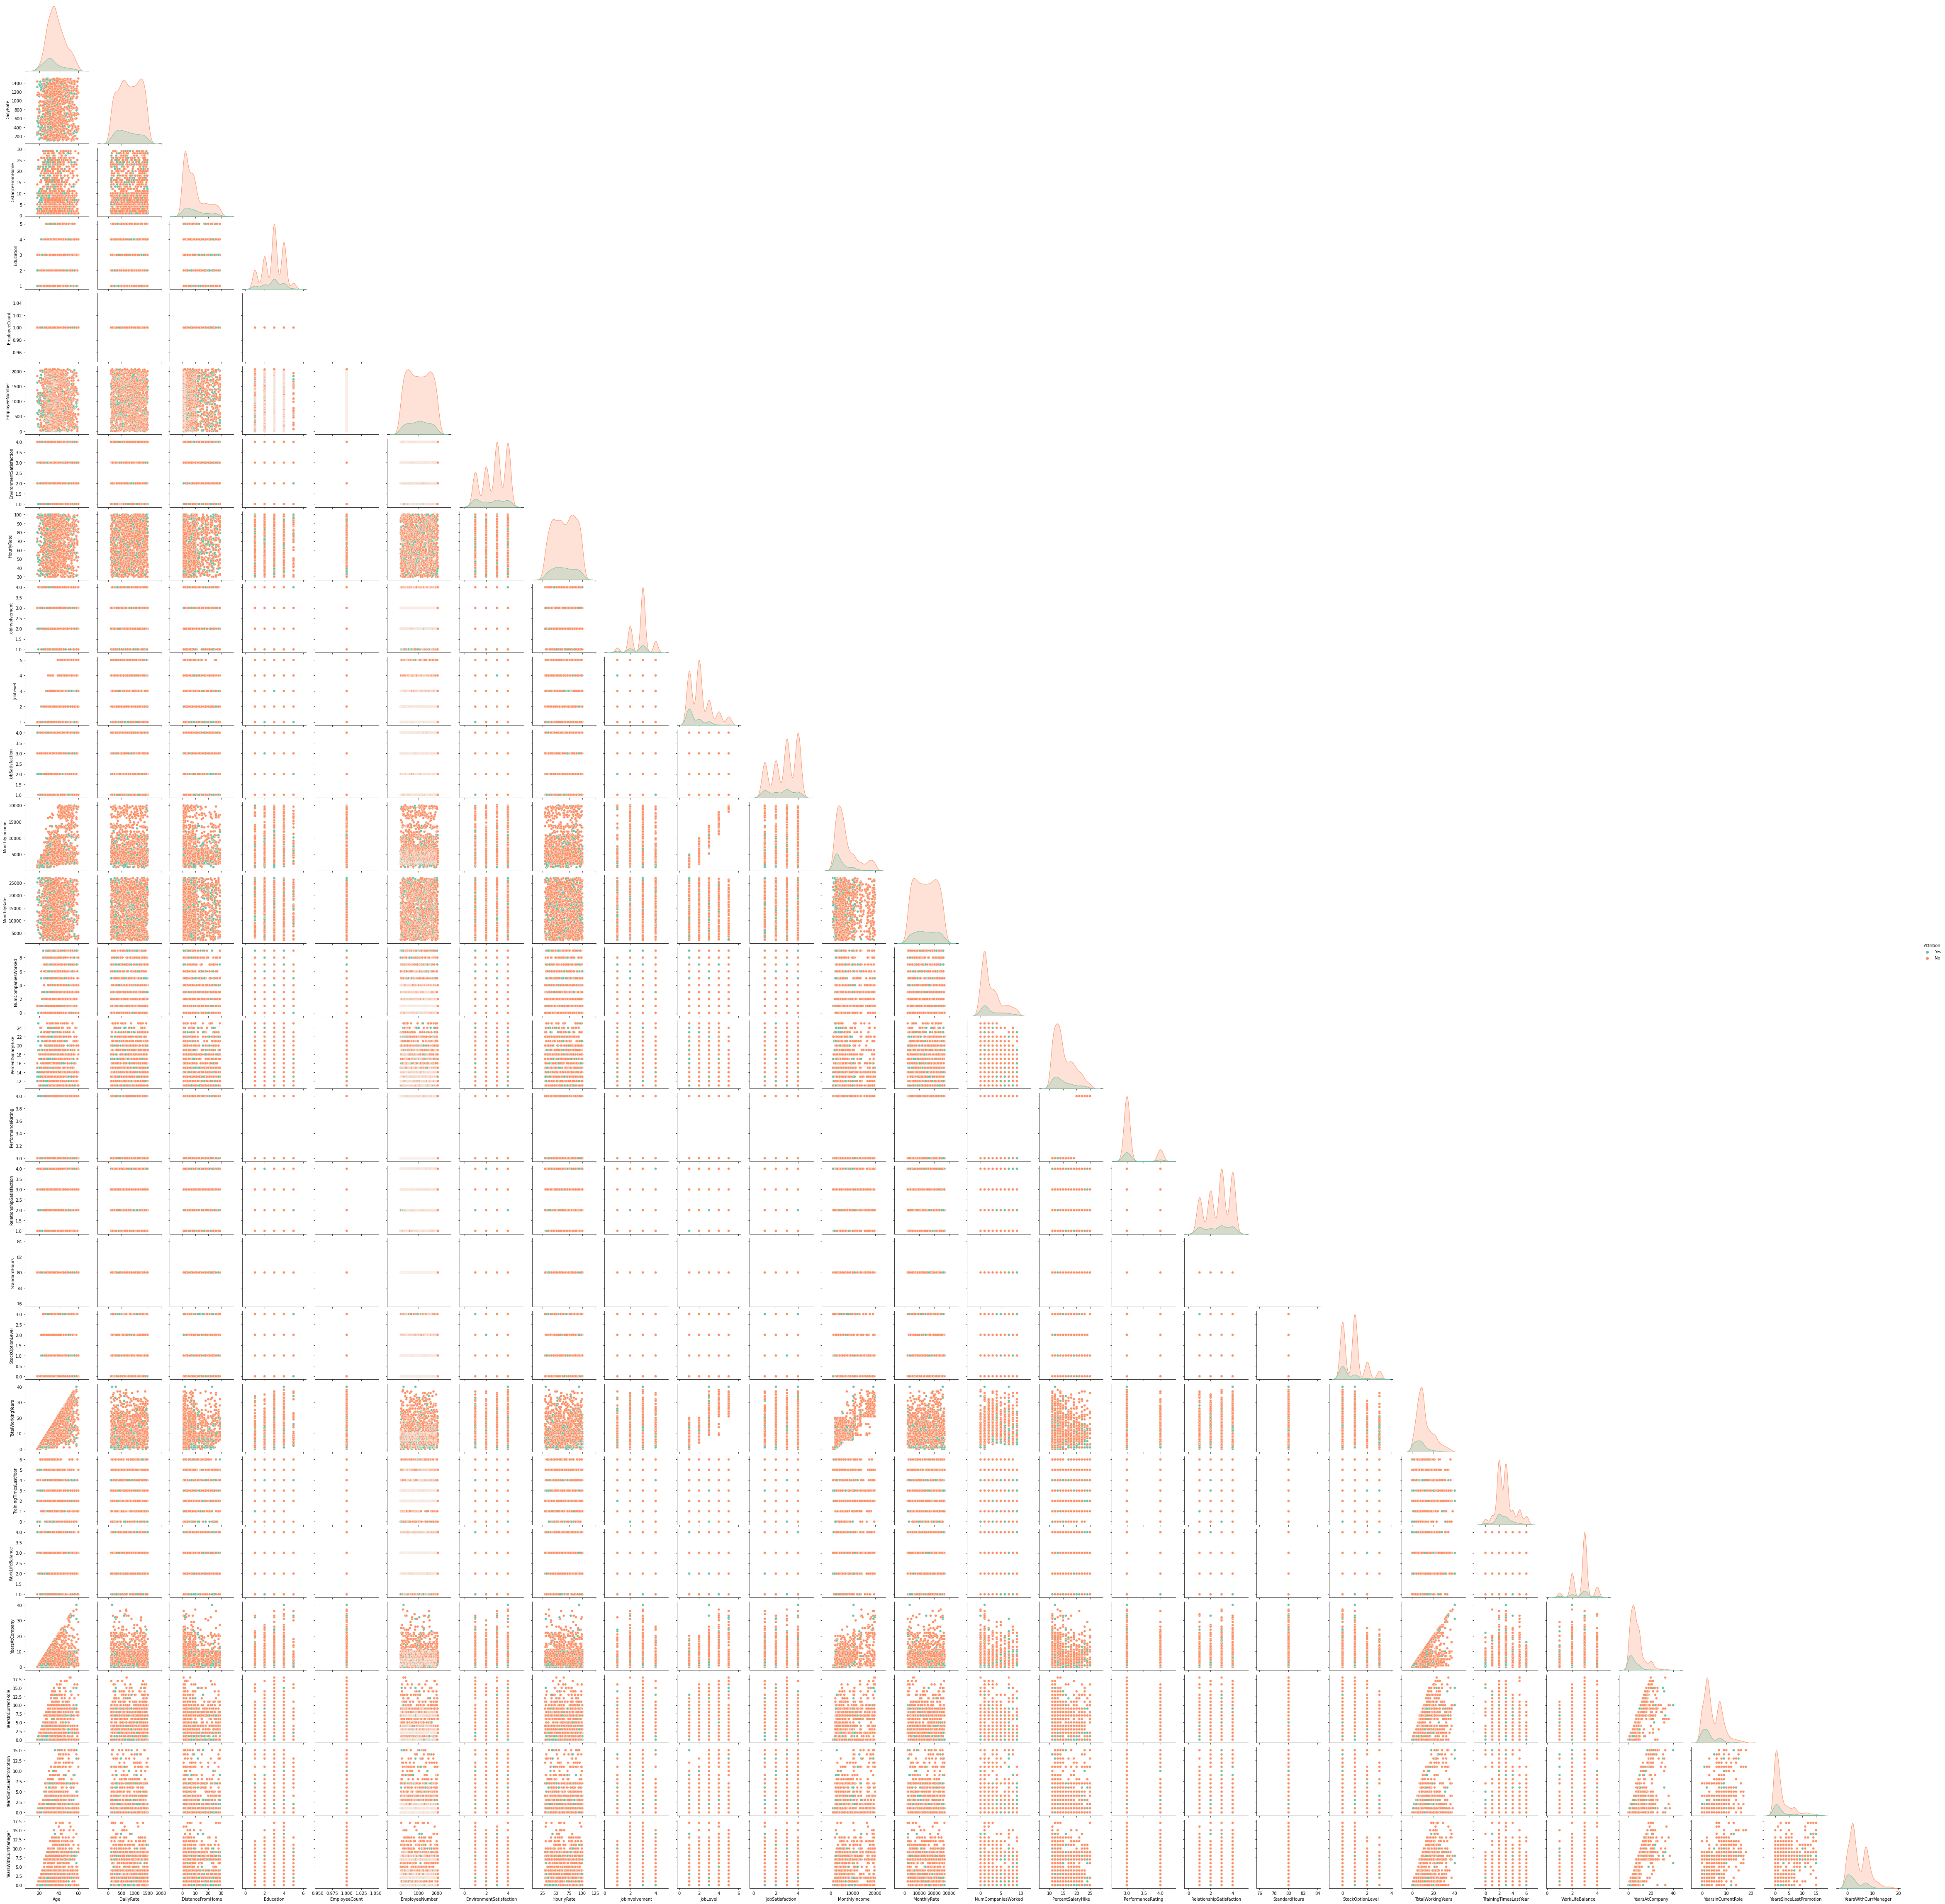

In [8]:
df.select_dtypes(exclude='object').join(df['Attrition'])
sns.pairplot(df.select_dtypes(exclude='object').join(df['Attrition']), hue = 'Attrition', palette = 'Set2', corner=True)

In [9]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
df.corr().style.background_gradient(cmap='coolwarm')

D:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
D:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [11]:
print(df['EmployeeCount'].value_counts())
print(df['StandardHours'].value_counts())


1    1470
Name: EmployeeCount, dtype: int64
80    1470
Name: StandardHours, dtype: int64


se decide hacer drop a la columna EmployeeCount y StandardHours ya que no aportan información

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ProgramData\Anacond

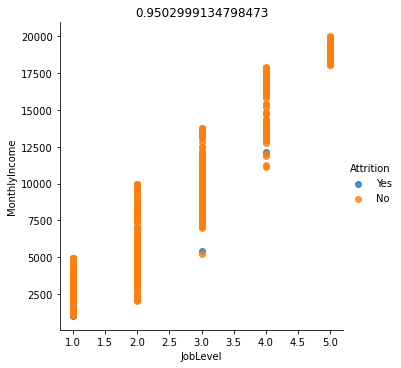

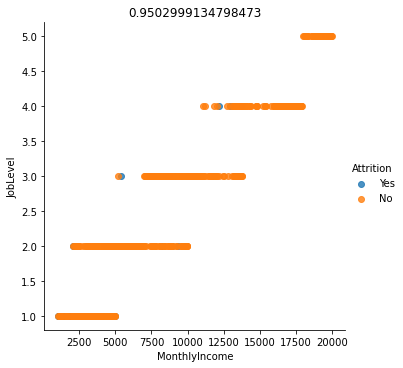

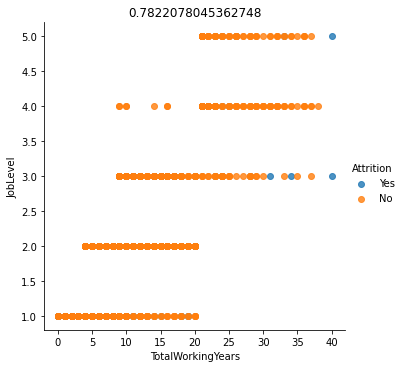

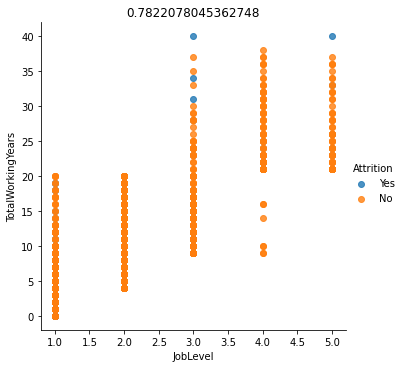

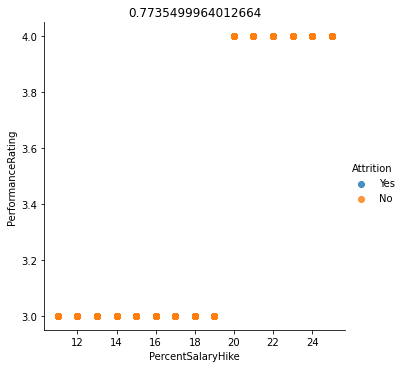

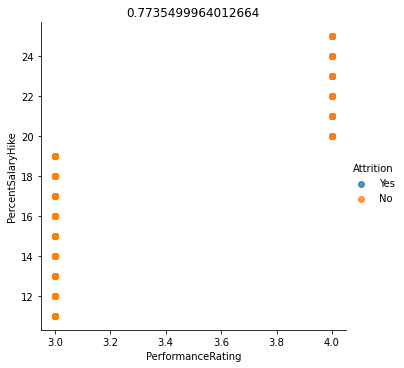

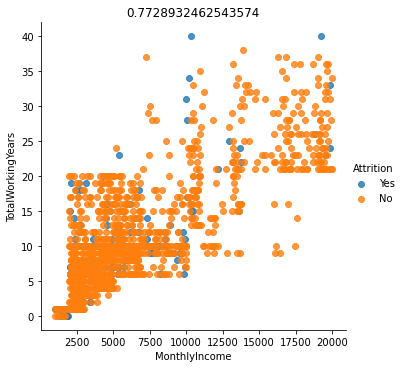

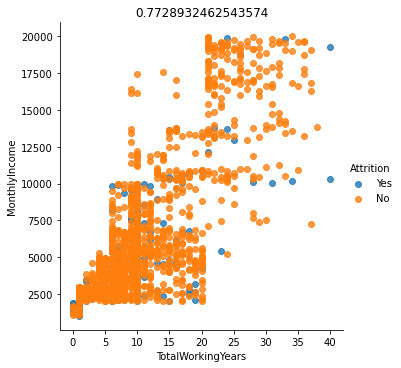

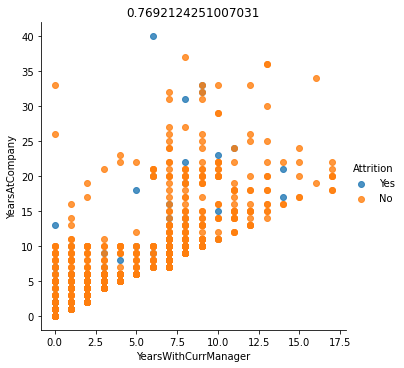

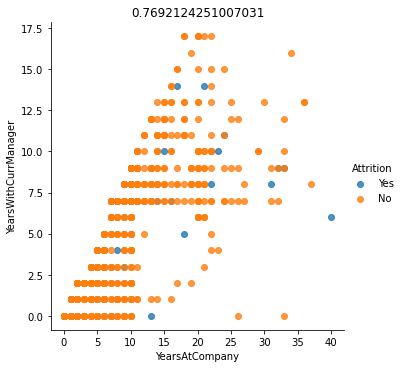

In [12]:
df_corr = df.corr().abs().unstack().reset_index()
top_corr = df_corr[df_corr[0]!=1].sort_values(by = 0,ascending=False).head(10)
# .sort_values(ascending=False)

for n in top_corr.index:

  sns.lmplot(df_corr.loc[n,'level_0'],  df_corr.loc[n,'level_1'], data=df, hue='Attrition', fit_reg=False)
  plt.title(df_corr.loc[n,0])

In [13]:
aux = df.pivot_table(index='BusinessTravel', columns= 'Attrition', aggfunc='count', margins=True)#.sort_values(by = 'All', ascending=False).drop('All', axis=1).drop('All').reset_index()
#aux.plot(x='Item_Type', kind = 'bar', stacked=True, ax = ax[0,0])
#ax[0,0].set_ylabel('Item_Outlet_Sales');
aux


Age            DailyRate            Department             \
Attrition            No  Yes   All        No  Yes   All         No  Yes   All   
BusinessTravel                                                                  
Non-Travel          138   12   150       138   12   150        138   12   150   
Travel_Frequently   208   69   277       208   69   277        208   69   277   
Travel_Rarely       887  156  1043       887  156  1043        887  156  1043   
All                1233  237  1470      1233  237  1470       1233  237  1470   

                  DistanceFromHome  ... YearsAtCompany YearsInCurrentRole  \
Attrition                       No  ...            All                 No   
BusinessTravel                      ...                                     
Non-Travel                     138  ...            150                138   
Travel_Frequently              208  ...            277                208   
Travel_Rarely                  887  ...           1043                887   
All                           1233  ...           1470               1233   

                             YearsSinceLastPromotion             \
Attrition          Yes   All                      No  Yes   All   
BusinessTravel                                                    
Non-Travel          12   150                     138   12   150   
Travel_Frequently   69   277                     208   69   277   
Travel_Rarely      156  1043                     887  156  1043   
All                237  1470                    1233  237  1470   

                  YearsWithCurrManager             
Attrition                           No  Yes   All  
BusinessTravel                                     
Non-Travel                         138   12   150  
Travel_Frequently                  208   69   277  
Travel_Rarely                      887  156  1043  
All                               1233  237  1470  

[4 rows x 99 columns]

<AxesSubplot:xlabel='BusinessTravel'>

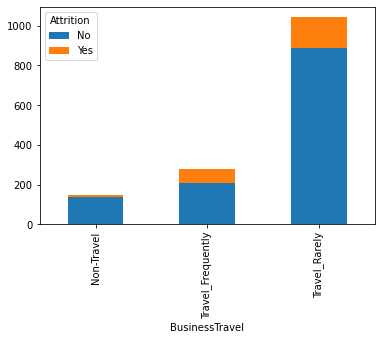

In [14]:
df[['BusinessTravel','Attrition']].value_counts().unstack().plot(kind='bar',stacked='true')

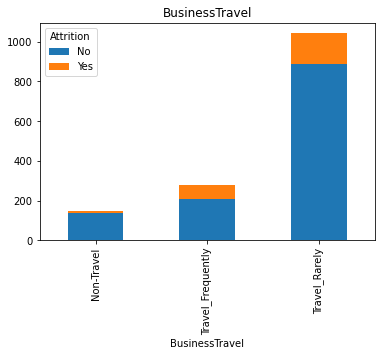

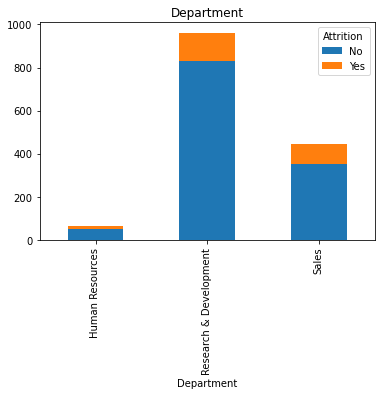

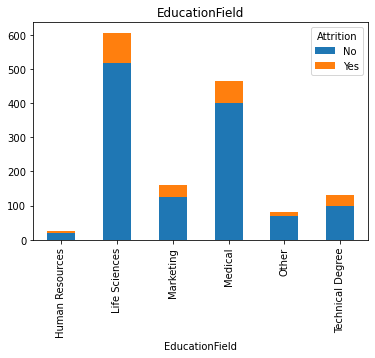

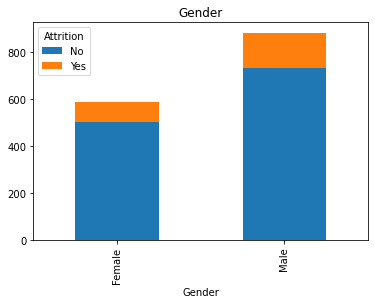

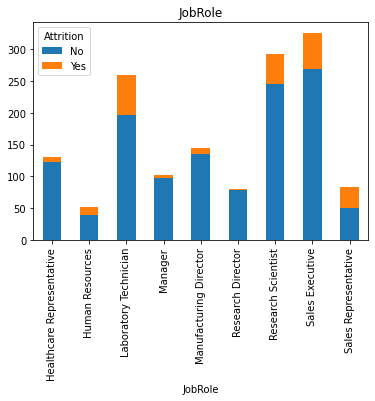

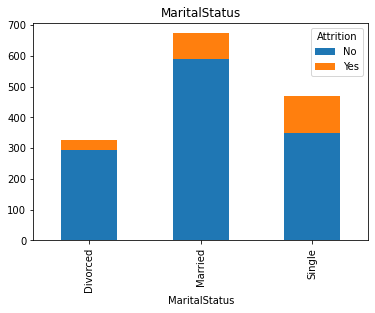

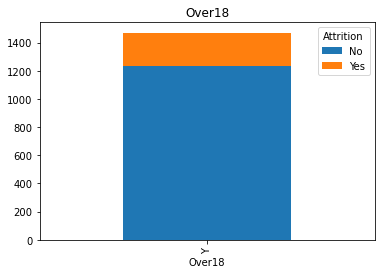

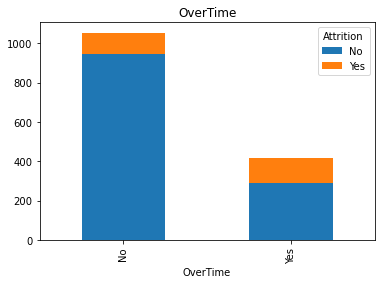

In [15]:
for n in df.drop(columns='Attrition').select_dtypes(include='object'):
  df[[n,'Attrition']].value_counts().unstack().plot(kind='bar',stacked='true')
  plt.title(n)
  plt.xticks(rotation=90)

Como resumen podemos concluir lo siguiente:
- Como el propósito de es entrenar un algoritmo de machine, se opta por hacer drop a las siguientes columnas que no aportan información: Over18, EmployeeCount y StandardHours 
- Se nota el sesgo en varias columnas: OverTime, BusinessTravel, Department
- Se decide utilizar Attrition como la variable target para los algoritmos ML, esto quita que tambien se hará un análisis no supervisado para detecar patrones de esta misma variable con otras

In [16]:
df.drop(columns=['Over18','EmployeeCount','StandardHours'], inplace = True)

In [17]:
df.select_dtypes(include='object')

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus OverTime  
0     Female            Sales Executive        Single      Yes  
1       Male         Research Scientist       Married       No  
2       Male      Laboratory Technician        Single      Yes  
3     Female         Research Scientist       Married      Yes  
4       Male      Laboratory Technician       Married       No  
...      ...                        ...           ...      ...  
1465    Male      Laboratory Technician       Married       No  
1466    Male  Healthcare Representative       Married       No  
1467    Male     Manufacturing Director       Married      Yes  
1468    Male            Sales Executive       Married       No  
1469    Male      Laboratory Technician       Married       No  

[1470 rows x 8 columns]

In [18]:
df_disagregated = df.copy()

In [19]:
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [20]:
columns_resp = df.select_dtypes(include='object').columns
ohe = OneHotEncoder(sparse=False)

for col in columns_resp:
  print(col)
  print('pass')
  result = ohe.fit_transform(df_disagregated[col].values.reshape(-1,1))
  print(ohe.categories_)
  df_disagregated.reset_index(drop=True, inplace = True)
  df_disagregated = df_disagregated.merge(pd.DataFrame(result, columns=ohe.categories_[0]) , left_index=True, right_index=True)
  df_disagregated.drop(col, axis=1, inplace = True)

Attrition
pass
[array(['No', 'Yes'], dtype=object)]
BusinessTravel
pass
[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)]
Department
pass
[array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)]
EducationField
pass
[array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)]
Gender
pass
[array(['Female', 'Male'], dtype=object)]
JobRole
pass
[array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)]
MaritalStatus
pass
[array(['Divorced', 'Married', 'Single'], dtype=object)]
OverTime
pass
[array(['No', 'Yes'], dtype=object)]


In [21]:
df_disagregated

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0      41       1102                 1          2               1   
1      49        279                 8          1               2   
2      37       1373                 2          2               4   
3      33       1392                 3          4               5   
4      27        591                 2          1               7   
...   ...        ...               ...        ...             ...   
1465   36        884                23          2            2061   
1466   39        613                 6          1            2062   
1467   27        155                 4          3            2064   
1468   49       1023                 2          3            2065   
1469   34        628                 8          3            2068   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2   
1                           3          61               2         2   
2                           4          92               2         1   
3                           4          56               3         1   
4                           1          40               3         1   
...                       ...         ...             ...       ...   
1465                        3          41               4         2   
1466                        4          42               2         3   
1467                        2          87               4         2   
1468                        4          63               2         2   
1469                        2          82               4         2   

      JobSatisfaction  ...  Manufacturing Director  Research Director  \
0                   4  ...                     0.0                0.0   
1                   2  ...                     0.0                0.0   
2                   3  ...                     0.0                0.0   
3                   3  ...                     0.0                0.0   
4                   2  ...                     0.0                0.0   
...               ...  ...                     ...                ...   
1465                4  ...                     0.0                0.0   
1466                1  ...                     0.0                0.0   
1467                2  ...                     1.0                0.0   
1468                2  ...                     0.0                0.0   
1469                3  ...                     0.0                0.0   

      Research Scientist  Sales Executive  Sales Representative  Divorced  \
0                    0.0              1.0                   0.0       0.0   
1                    1.0              0.0                   0.0       0.0   
2                    0.0              0.0                   0.0       0.0   
3                    1.0              0.0                   0.0       0.0   
4                    0.0              0.0                   0.0       0.0   
...                  ...              ...                   ...       ...   
1465                 0.0              0.0                   0.0       0.0   
1466                 0.0              0.0                   0.0       0.0   
1467                 0.0              0.0                   0.0       0.0   
1468                 0.0              1.0                   0.0       0.0   
1469                 0.0              0.0                   0.0       0.0   

      Married  Single  No_y  Yes_y  
0         0.0     1.0   0.0    1.0  
1         1.0     0.0   1.0    0.0  
2         0.0     1.0   0.0    1.0  
3         1.0     0.0   0.0    1.0  
4         1.0     0.0   1.0    0.0  
...       ...     ...   ...    ...  
1465      1.0     0.0   1.0    0.0  
1466      1.0     0.0   1.0    0.0  
1467      1.0     0.0   0.0    1.0  
1468      1.0     0.0   1.0    0.0  
1469      1.0     0.0   1.0    0.0  

[1470 rows x 54 columns]

In [22]:
df_disagregated.dtypes

Age                            int64
DailyRate                      int64
DistanceFromHome               int64
Education                      int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobSatisfaction                int64
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
YearsAtCompany                 int64
YearsInCurrentRole             int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
No_x                         float64
Yes_x                        float64
Non-Travel                   float64
T

In [23]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    1          2  Life Sciences               1   
1                    8          1  Life Sciences               2   
2                    2          2          Other               4   
3                    3          4  Life Sciences               5   
4                    2          1        Medical               7   
...                ...        ...            ...             ...   
1465                23          2        Medical            2061   
1466                 6          1        Medical            2062   
1467                 4          3  Life Sciences            2064   
1468                 2          3        Medical            2065   
1469                 8          3        Medical            2068   

      EnvironmentSatisfaction  ... PerformanceRating  \
0                           2  ...                 3   
1                           3  ...                 4   
2                           4  ...                 3   
3                           4  ...                 3   
4                           1  ...                 3   
...                       ...  ...               ...   
1465                        3  ...                 3   
1466                        4  ...                 3   
1467                        2  ...                 4   
1468                        4  ...                 3   
1469                        2  ...                 3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

     TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                        0                1              6   
1                        3                3             10   
2                        3                3              0   
3                        3                3              8   
4                        3                3              2   
...                    ...              ...            ...   
1465                     3                3              5   
1466                     5                3              7   
1467                     0                3              6   
1468                     3                2              9   
1469                     3                4             

In [24]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [25]:
df_disagregated.rename(columns={'No_x' : 'No_atrition',
                                'Yes_x' : 'Yes_atrition',
                                'No_y' : 'No_OverTime', 
                                'Yes_y' : 'Yes_OverTime',
                                'Human Resources_x' : 'Human Resources_Department',
                                'Human Resources_y' : 'Human Resources_JobRole'}, inplace = True)

In [26]:
df_disagregated.dtypes

Age                             int64
DailyRate                       int64
DistanceFromHome                int64
Education                       int64
EmployeeNumber                  int64
EnvironmentSatisfaction         int64
HourlyRate                      int64
JobInvolvement                  int64
JobLevel                        int64
JobSatisfaction                 int64
MonthlyIncome                   int64
MonthlyRate                     int64
NumCompaniesWorked              int64
PercentSalaryHike               int64
PerformanceRating               int64
RelationshipSatisfaction        int64
StockOptionLevel                int64
TotalWorkingYears               int64
TrainingTimesLastYear           int64
WorkLifeBalance                 int64
YearsAtCompany                  int64
YearsInCurrentRole              int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
No_atrition                   float64
Yes_atrition                  float64
Non-Travel  

In [27]:
X_agregated  = df.drop(columns='Attrition')
X_disagregated = df_disagregated.drop(columns=['Yes_atrition','No_atrition'])
y = df['Attrition']


In [28]:
X_agregated

Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
...   ...                ...        ...                     ...   
1465   36  Travel_Frequently        884  Research & Development   
1466   39      Travel_Rarely        613  Research & Development   
1467   27      Travel_Rarely        155  Research & Development   
1468   49  Travel_Frequently       1023                   Sales   
1469   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    1          2  Life Sciences               1   
1                    8          1  Life Sciences               2   
2                    2          2          Other               4   
3                    3          4  Life Sciences               5   
4                    2          1        Medical               7   
...                ...        ...            ...             ...   
1465                23          2        Medical            2061   
1466                 6          1        Medical            2062   
1467                 4          3  Life Sciences            2064   
1468                 2          3        Medical            2065   
1469                 8          3        Medical            2068   

      EnvironmentSatisfaction  Gender  ...  PerformanceRating  \
0                           2  Female  ...                  3   
1                           3    Male  ...                  4   
2                           4    Male  ...                  3   
3                           4  Female  ...                  3   
4                           1    Male  ...                  3   
...                       ...     ...  ...                ...   
1465                        3    Male  ...                  3   
1466                        4    Male  ...                  3   
1467                        2    Male  ...                  4   
1468                        4    Male  ...                  3   
1469                        2    Male  ...                  3   

      RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
0                            1                 0                 8   
1                            4                 1                10   
2                            2                 0                 7   
3                            3                 0                 8   
4                            4                 1                 6   
...                        ...               ...               ...   
1465                         3                 1                17   
1466                         1                 1                 9   
1467                         2                 1                 6   
1468                         4                 0                17   
1469                         1                 0                 6   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                         0               1               6   
1                         3               3              10   
2                         3               3               0   
3                         3               3               8   
4                         3               3               2   
...                     ...             ...             ...   
1465                      3               3               5   
1466                      5               3               7   
1467                      0               3               6   
1468                      3               2               9   
1469                      3               4               4   

     

In [29]:
X_disagregated

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0      41       1102                 1          2               1   
1      49        279                 8          1               2   
2      37       1373                 2          2               4   
3      33       1392                 3          4               5   
4      27        591                 2          1               7   
...   ...        ...               ...        ...             ...   
1465   36        884                23          2            2061   
1466   39        613                 6          1            2062   
1467   27        155                 4          3            2064   
1468   49       1023                 2          3            2065   
1469   34        628                 8          3            2068   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2   
1                           3          61               2         2   
2                           4          92               2         1   
3                           4          56               3         1   
4                           1          40               3         1   
...                       ...         ...             ...       ...   
1465                        3          41               4         2   
1466                        4          42               2         3   
1467                        2          87               4         2   
1468                        4          63               2         2   
1469                        2          82               4         2   

      JobSatisfaction  ...  Manufacturing Director  Research Director  \
0                   4  ...                     0.0                0.0   
1                   2  ...                     0.0                0.0   
2                   3  ...                     0.0                0.0   
3                   3  ...                     0.0                0.0   
4                   2  ...                     0.0                0.0   
...               ...  ...                     ...                ...   
1465                4  ...                     0.0                0.0   
1466                1  ...                     0.0                0.0   
1467                2  ...                     1.0                0.0   
1468                2  ...                     0.0                0.0   
1469                3  ...                     0.0                0.0   

      Research Scientist  Sales Executive  Sales Representative  Divorced  \
0                    0.0              1.0                   0.0       0.0   
1                    1.0              0.0                   0.0       0.0   
2                    0.0              0.0                   0.0       0.0   
3                    1.0              0.0                   0.0       0.0   
4                    0.0              0.0                   0.0       0.0   
...                  ...              ...                   ...       ...   
1465                 0.0              0.0                   0.0       0.0   
1466                 0.0              0.0                   0.0       0.0   
1467                 0.0              0.0                   0.0       0.0   
1468                 0.0              1.0                   0.0       0.0   
1469                 0.0              0.0                   0.0       0.0   

      Married  Single  No_OverTime  Yes_OverTime  
0         0.0     1.0          0.0           1.0  
1         1.0     0.0          1.0           0.0  
2         0.0     1.0          0.0           1.0  
3         1.0     0.0          0.0           1.0  
4         1.0     0.0          1.0           0.0  
...       ...     ...          ...           ...  
1465      1.0     0.0          1.0           0.0  
1466      1.0     0.0          1.0           0.0  
1467      1.0     0.0          0.0           1.0  
1468      1.

In [30]:

columns_objects = X_agregated.select_dtypes(include='object')
labelencoder = LabelEncoder()

for col in columns_objects:
  print(col)
  X_agregated[col] = labelencoder.fit_transform(X_agregated[col])
  print('pass')

X_agregated.head()

BusinessTravel
pass
Department
pass
EducationField
pass
Gender
pass
JobRole
pass
MaritalStatus
pass
OverTime
pass


Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EmployeeNumber  EnvironmentSatisfaction  Gender  ...  \
0               1               1                        2       0  ...   
1               1               2                        3       1  ...   
2               4               4                        4       1  ...   
3               1               5                        4       0  ...   
4               3               7                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

In [31]:
X_agregated_train, X_agregated_test, y_train, y_test = train_test_split(X_agregated, y, test_size=0.30, random_state=42, stratify=y)

In [32]:
scaler = StandardScaler()
X_agregated_train = scaler.fit_transform(X_agregated_train)
X_agregated_test = scaler.transform(X_agregated_test)

In [33]:
rfc = RandomForestClassifier(bootstrap= True,
                             max_depth= 30,
                             max_features= 'sqrt',
                             min_samples_leaf= 4,
                             min_samples_split= 10,
                             n_estimators= 1000)
rfc.fit(X_agregated_train, y_train)
print(rfc.score(X_agregated_train, y_train))
print(rfc.score(X_agregated_test, y_test))

0.9057337220602527
0.8299319727891157


<BarContainer object of 31 artists>

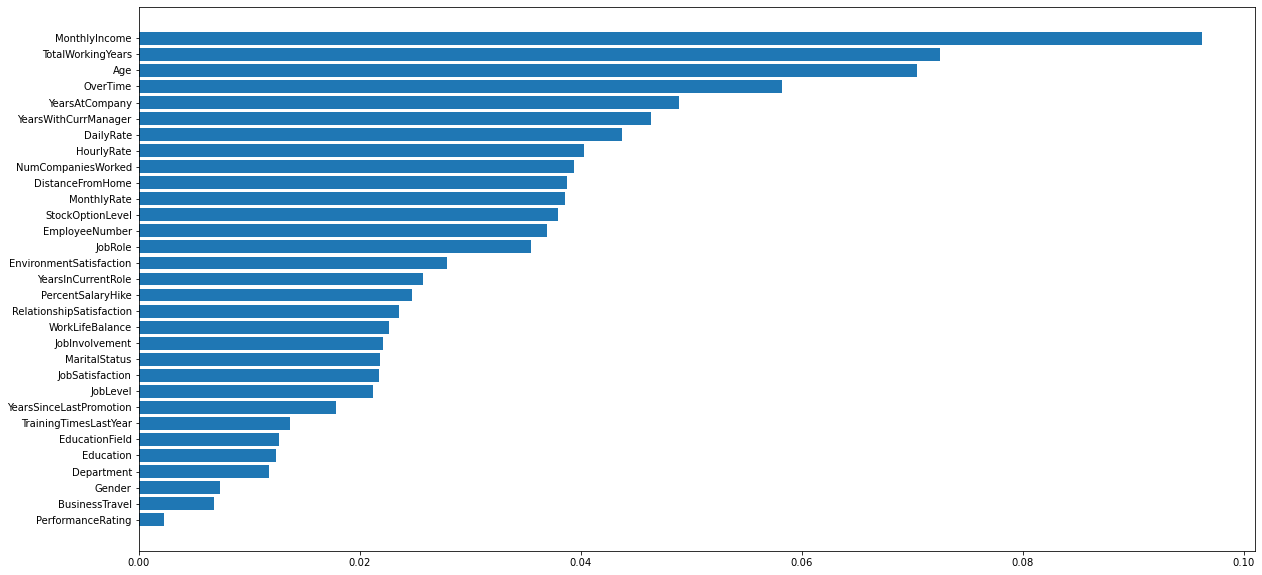

In [34]:
rfc.feature_importances_
agregated_features = pd.DataFrame({'Features':X_agregated.columns , 'Values':rfc.feature_importances_ })
agregated_features.sort_values(by='Values', inplace = True)
plt.figure(figsize=(20,10))
plt.barh(agregated_features['Features'],agregated_features['Values'])

In [35]:
X_disagregated_train, X_disagregated_test, y_train, y_test = train_test_split(X_disagregated, y, test_size=0.30, random_state=42, stratify=y)

In [36]:
scaler = StandardScaler()
X_disagregated_train = scaler.fit_transform(X_disagregated_train)
X_disagregated_test = scaler.transform(X_disagregated_test)

In [37]:
rfc = RandomForestClassifier(bootstrap= True,
                             max_depth= 30,
                             max_features= 'sqrt',
                             min_samples_leaf= 4,
                             min_samples_split= 10,
                             n_estimators= 1000)
rfc.fit(X_disagregated_train, y_train)
print(rfc.score(X_disagregated_train, y_train))
print(rfc.score(X_disagregated_test, y_test))

0.9076773566569485
0.8367346938775511


<BarContainer object of 52 artists>

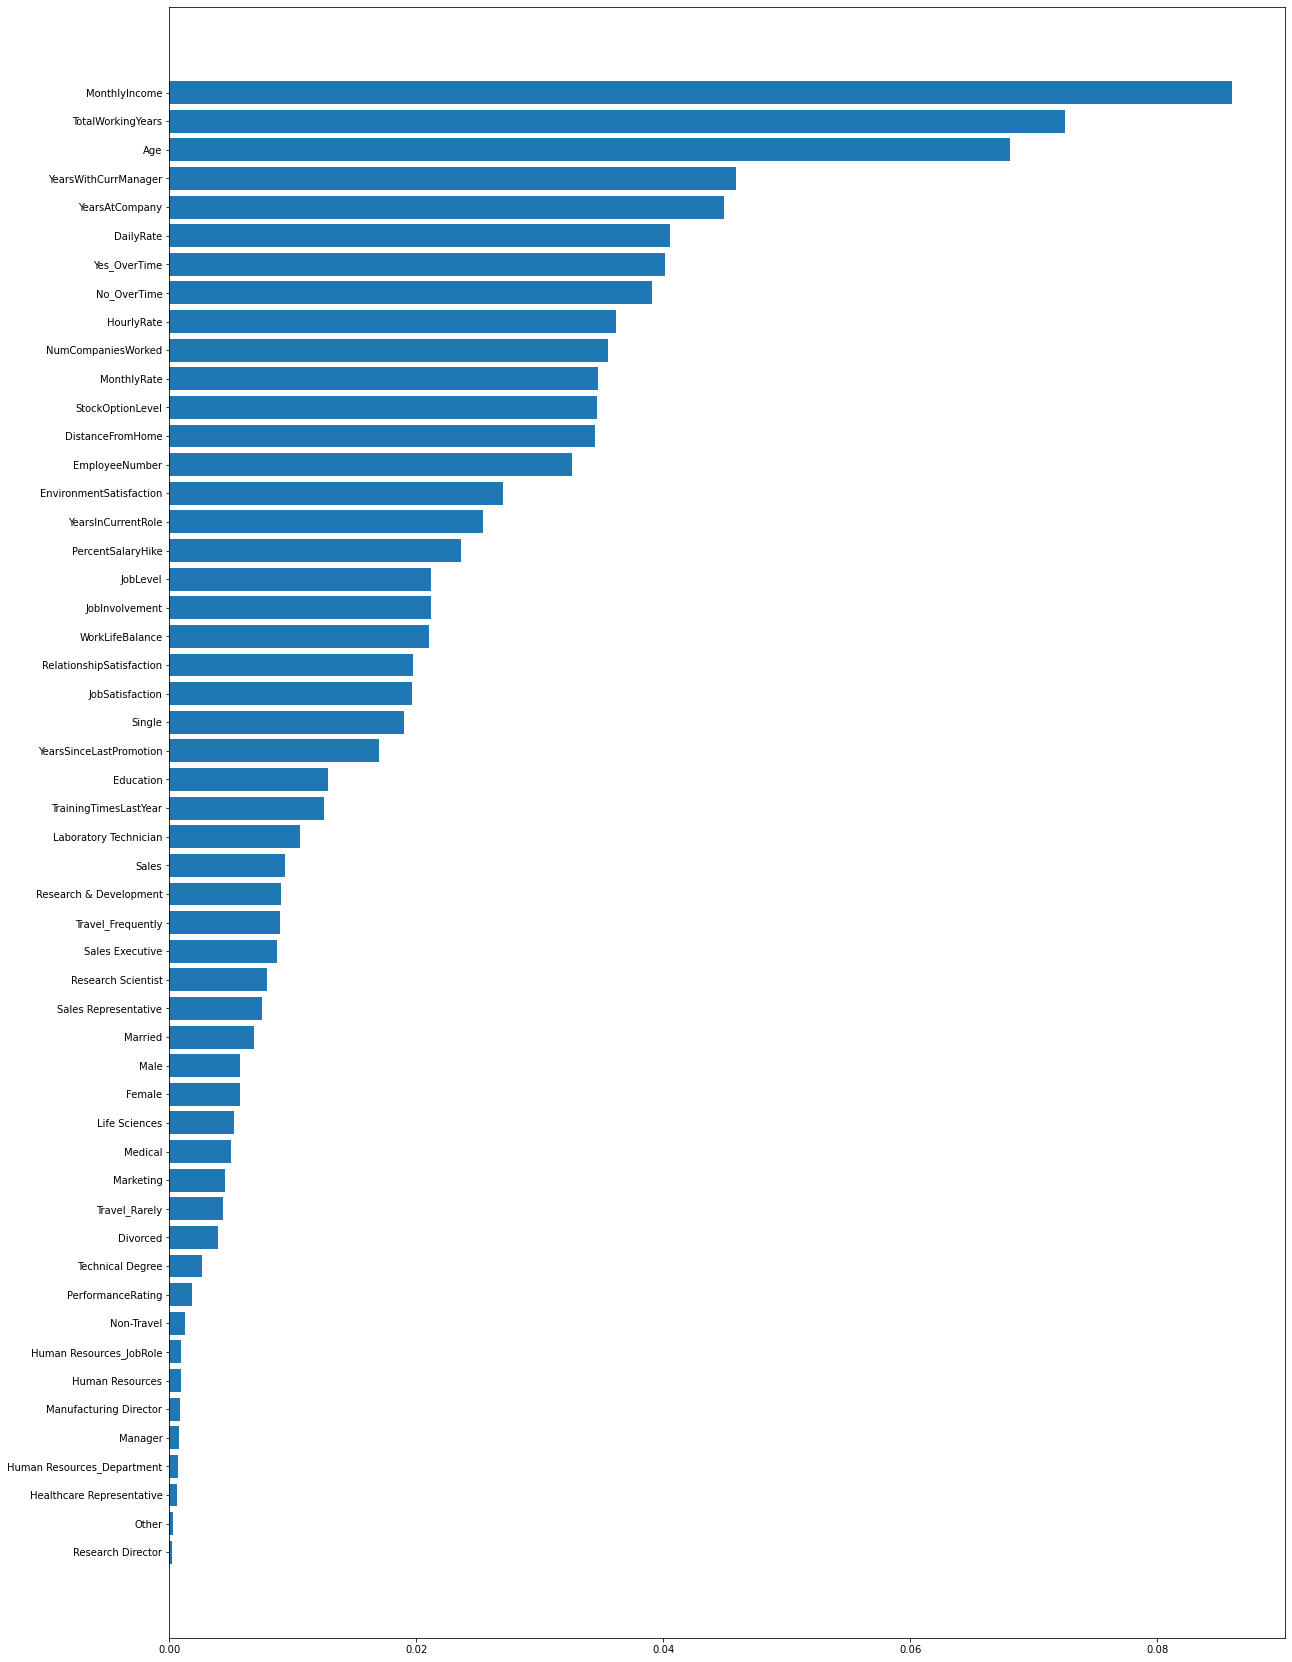

In [38]:
rfc.feature_importances_
disagregated_features = pd.DataFrame({'Features':X_disagregated.columns , 'Values':rfc.feature_importances_ })
disagregated_features.sort_values(by='Values', inplace = True)
plt.figure(figsize=(20,30))
plt.barh(disagregated_features['Features'],disagregated_features['Values'])

In [39]:
# # Number of trees in random forest
# n_estimators = list(range(200,2000,100))
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = list(range(5,40))
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4,5,6,7,8,9,10,11,12,13,14,15]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [40]:
# rf = RandomForestClassifier()

In [41]:
# rf_grid = GridSearchCV(estimator = rf
#                          ,param_grid = random_grid
#                          ,cv = 
#                          ,verbose=4
#                          , n_jobs = -1)

In [42]:
# rf_grid.fit(X_agregated_train, y_train)

In [43]:
# list(range(200,2000,100))

In [49]:
lgbm = LGBMClassifier()
lgbm.fit(X_agregated_train, y_train)

LGBMClassifier()

In [53]:
print(lgbm.score(X_agregated_train, y_train))
print(lgbm.score(X_agregated_test, y_test))

1.0
0.8526077097505669


In [54]:
lgbm = LGBMClassifier()
lgbm.fit(X_disagregated_train, y_train)

LGBMClassifier()

In [55]:
print(lgbm.score(X_disagregated_train, y_train))
print(lgbm.score(X_disagregated_test, y_test))

1.0
0.8435374149659864
